Ignacio Vellido Expósito

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Colab Notebooks/tsc/"

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.preprocessing import MinMaxScaler

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/tsc/"

# Importamos el conjunto de entrenamiento
training_set = pd.read_csv(path + 'Google_Stock_Price_Train.csv', sep=',')

# Trabajaremos con la columna “Open”
training_set = training_set.iloc[:,1:2].values

In [ ]:
sc = MinMaxScaler() # por defecto es 0,1

# Normalizamos el conjunto de entrenamiento
training_set = sc.fit_transform(training_set)

# Obtenemos el conjunto de entrada a la red y el conjunto de salidas,
# x_train es la entrada, y_train es la salida
X_train = training_set[0:1257]
y_train = training_set[1:1258]
X_train = np.reshape(X_train, (1257, 1, 1))

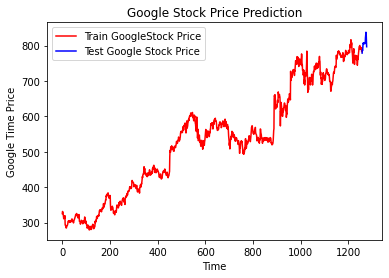

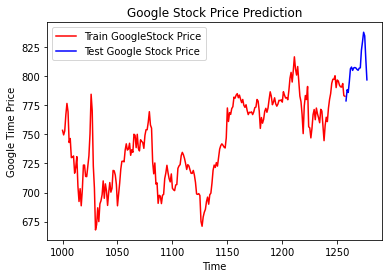

In [ ]:
# Visualizar datos al completo
dataset_train = pd.read_csv(path + 'Google_Stock_Price_Train.csv', sep=',')
train_set = dataset_train.iloc[:,1:2].values
dataset_test = pd.read_csv(path + 'Google_Stock_Price_Test.csv', sep=',')
test_set=dataset_test.iloc[:,1:2].values
train_length = len(train_set)

# Prediciendo Accion Google 2017
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0,ignore_index=True)

plt.plot(dataset_total[0:train_length], color = 'red', label = 'Train GoogleStock Price')
plt.plot(dataset_total[train_length:], color = 'blue', label = 'Test Google Stock Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()

plt.plot(dataset_total[1000:train_length], color = 'red', label = 'Train GoogleStock Price')
plt.plot(dataset_total[train_length:], color = 'blue', label = 'Test Google Stock Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()

No contamos con una serie temporal estacional.

In [ ]:
# Parte 3 – Hacer las predicciones y visualizar los resultados

# Obtener el precio real de las acciones de 2017
test_set = pd.read_csv(path + 'Google_Stock_Price_Test.csv', sep=',')
real_stock_price = test_set.iloc[:,1:2].values

inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))

def get_loss(regressor):
  loss, mae = regressor.evaluate(inputs, inputs, verbose=0)
  print("\nTest loss: {}".format(loss))
  print("MAE:       {}\n".format(mae))

def plot_prediction(real_stock_price, predicted_stock_price):
  plt.plot(real_stock_price, color = 'red', label = 'Real GoogleStock Price')
  plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price', )
  plt.ylim(650,850)
  plt.title('Google Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Google Time Price')
  plt.legend()
  plt.show()

def summary_experiment(regressor):
  print(model.summary())

  print("Epochs:     {}".format(epochs))
  print("Batch size: {}".format(batch_size))

  predicted_stock_price = regressor.predict(inputs)
  predicted_stock_price = sc.inverse_transform(predicted_stock_price)

  get_loss(regressor)
  plot_prediction(real_stock_price, predicted_stock_price)

In [ ]:
# Parte 2 – Construyendo la Red Neural Recurrente

# Inicializamos el modelo
model = Sequential([                         
  LSTM(4, input_shape = (None, 1)),
      #  return_sequences=True),
  # LSTM(8, return_sequences=True,),
  # LSTM(8, return_sequences=True,),
  # LSTM(8),
  # Dropout(0.5),  
  Dense(1)  
])

# -------------------------------------------------------------------

# Parámetros
batch_size = 2
epochs = 100

# Compilamos el modelo indicándole el optimizador y la función de
model.compile(optimizer = 'adam', loss = 'mean_squared_error',
              metrics = ["mean_absolute_error"])
history = model.fit(X_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0)

### Conclusiones

En contraposición con las redes feedforward, apreciamos más influencia de la regularización y del tamaño del batch en los modelos.

Sobre el primero, notamos que a una mayor regularización la red intenta mediar las salidas, de forma que existan las mínimas variaciones en cada paso de tiempo. Cláramente para la predicción de acciones, un problema de alta variabilidad, afecta negativamente.

Respecto al segundo, sabemos que las LSTM limpian la memoria tras cada batch, por lo que es el batch_size el que nos permite ajustar los efectos de la secuencia temporal. Los resultados parecen indicarnos que un tamaño mayor de batch hace que la red sea más propensa a seguir las tendencias de esos pasos de tiempo (por ejemplo comparando los modelos 1 y 6).

En cuanto a la profundidad y al tamaño de las capas en la red volvemos a encontrarnos los problemas presentes en las redes feedforward, como es el overfitting y el underfitting.
En este problema no contamos con una función clara que modelar, por lo que los efectos en el conjunto de test no son apreciables y nos deberíamos basar en un conjunto de validación en training.

Aún así, se debe priorizar simplicar la arquitectura en la medida de lo posible sin empeorar mucho el error.


Adicionalmente, sobre el uso de funciones de activación, estas no son necesarias con LSTM puesto que ya están diseñadas para evitar el desvanecimiento de gradientes, y además vemos que los efectos en la calidad de predicción no tienen cambios significativos.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 320       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
None
Epochs:     100
Batch size: 2

Test loss: 0.00010533654130995274
MAE:       0.010030591860413551



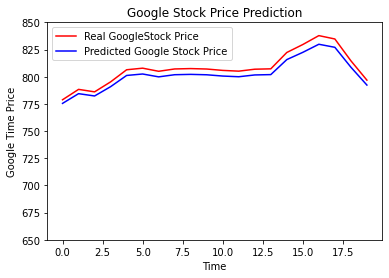

In [ ]:
# 15 - Mejor modelo (6), rmsprop
summary_experiment(model)

Los modelos de aquí hacia abajo tenían un error en la evaluación del conjunto de test. Solo se ven afectadas las medias MSE y MAE, no las predicciones en sí.

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_70 (LSTM)               (None, None, 8)           320       
_________________________________________________________________
lstm_71 (LSTM)               (None, None, 8)           544       
_________________________________________________________________
lstm_72 (LSTM)               (None, None, 8)           544       
_________________________________________________________________
lstm_73 (LSTM)               (None, 8)                 544       
_________________________________________________________________
dropout_51 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 9         
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
___________________________________________________

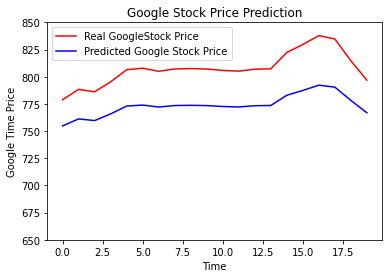

In [ ]:
# 14 - Más regularización, menos unidades
summary_experiment(model)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_62 (LSTM)               (None, None, 25)          2700      
_________________________________________________________________
lstm_63 (LSTM)               (None, None, 25)          5100      
_________________________________________________________________
lstm_64 (LSTM)               (None, None, 25)          5100      
_________________________________________________________________
lstm_65 (LSTM)               (None, 25)                5100      
_________________________________________________________________
dropout_49 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 208       
_________________________________________________________________
dense_28 (Dense)             (None, 1)               

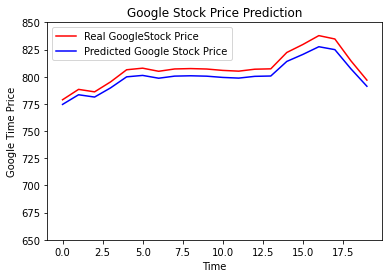

In [ ]:
# 13 - Simplificando unidades, una Dense más
summary_experiment(model)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_58 (LSTM)               (None, None, 100)         40800     
_________________________________________________________________
dropout_47 (Dropout)         (None, None, 100)         0         
_________________________________________________________________
lstm_59 (LSTM)               (None, None, 100)         80400     
_________________________________________________________________
lstm_60 (LSTM)               (None, None, 100)         80400     
_________________________________________________________________
dropout_48 (Dropout)         (None, None, 100)         0         
_________________________________________________________________
lstm_61 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_26 (Dense)             (None, 1)               

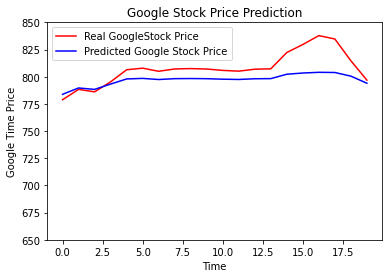

In [ ]:
# 12 - Más capas
summary_experiment(model)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_55 (LSTM)               (None, None, 100)         40800     
_________________________________________________________________
dropout_45 (Dropout)         (None, None, 100)         0         
_________________________________________________________________
lstm_56 (LSTM)               (None, None, 100)         80400     
_________________________________________________________________
dropout_46 (Dropout)         (None, None, 100)         0         
_________________________________________________________________
lstm_57 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 101       
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_______________________________________________

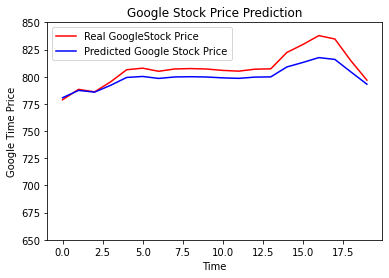

In [ ]:
# 11 - Más unidades
summary_experiment(model)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_52 (LSTM)               (None, None, 50)          10400     
_________________________________________________________________
dropout_43 (Dropout)         (None, None, 50)          0         
_________________________________________________________________
lstm_53 (LSTM)               (None, None, 50)          20200     
_________________________________________________________________
dropout_44 (Dropout)         (None, None, 50)          0         
_________________________________________________________________
lstm_54 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________

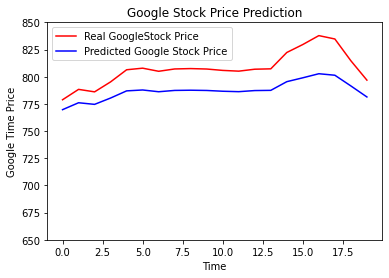

In [ ]:
# 10 = 9 sin sigmoid
summary_experiment(model)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_49 (LSTM)               (None, None, 50)          10400     
_________________________________________________________________
dropout_41 (Dropout)         (None, None, 50)          0         
_________________________________________________________________
lstm_50 (LSTM)               (None, None, 50)          20200     
_________________________________________________________________
dropout_42 (Dropout)         (None, None, 50)          0         
_________________________________________________________________
lstm_51 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________

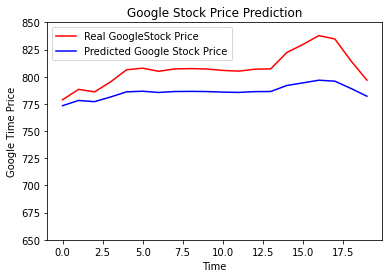

In [ ]:
# 9
# Hasta aquí todas con sigmoid
summary_experiment(model)

# Las funciones de activación no son necesarias con LSTM puesto que ya están diseñadas
# para evitar el desvanecimiento de gradientes.
# Además, así permitimos que cada salida de una LSTM tome los valores necesarios

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_44 (LSTM)               (None, None, 50)          10400     
_________________________________________________________________
dropout_38 (Dropout)         (None, None, 50)          0         
_________________________________________________________________
lstm_45 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
None
Epochs:     100
Batch size: 2
1/1 [==============================] - 0s 381ms/step - loss: 650799.4375 - mean_absolute_error: 806.5869

Test loss: 650799.4375
MAE:       806.5869140625



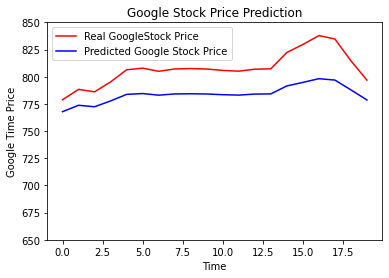

In [ ]:
# 8 - Con return sequences
summary_experiment(model)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, None, 8)           320       
_________________________________________________________________
dropout_37 (Dropout)         (None, None, 8)           0         
_________________________________________________________________
lstm_43 (LSTM)               (None, 8)                 544       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 873
Trainable params: 873
Non-trainable params: 0
_________________________________________________________________
None
Epochs:     100
Batch size: 2
1/1 [==============================] - 0s 429ms/step - loss: 650839.6250 - mean_absolute_error: 806.6119

Test loss: 650839.625
MAE:       806.6119384765625



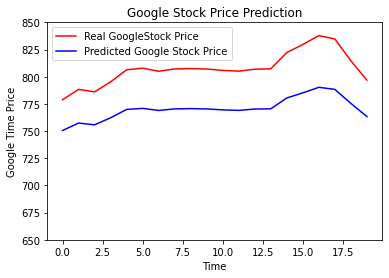

In [ ]:
# 7 - Con return sequences
summary_experiment(model)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 8)                 320       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
None
Epochs:     100
Batch size: 2

Test loss: 0.00010965118417516351
MAE:       0.010190293192863464



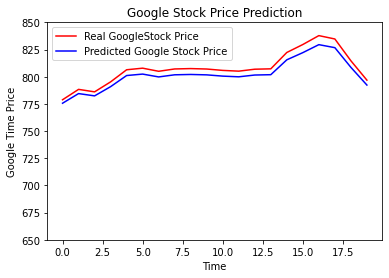

In [ ]:
# 6
summary_experiment(model)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None
Epochs:     100
Batch size: 2
1/1 [==============================] - 0s 16ms/step - loss: 650748.8125 - mean_absolute_error: 806.5557

Test loss: 650748.8125
MAE:       806.5556640625



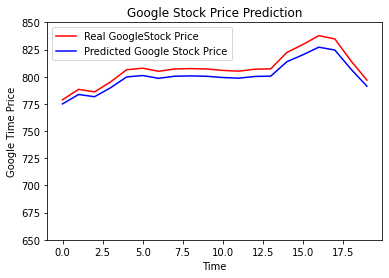

In [ ]:
# 5
summary_experiment(model)

# Solo 2
# La predicción es muy buena salvo en los días con alto cambio de precio

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None
Epochs:     100
Batch size: 8

Test loss: 650749.4375
MAE:       806.55615234375



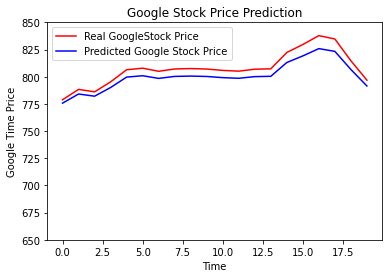

In [ ]:
# 4
summary_experiment(model)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None
Epochs:     100
Batch size: 16

Test loss: 650757.0
MAE:       806.560791015625



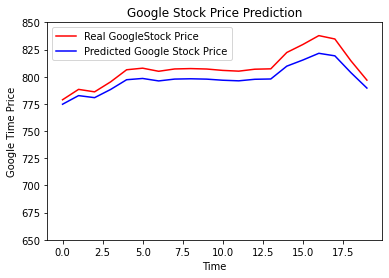

In [ ]:
# 3
summary_experiment(model)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, None, 50)          10400     
_________________________________________________________________
dropout_30 (Dropout)         (None, None, 50)          0         
_________________________________________________________________
lstm_29 (LSTM)               (None, None, 50)          20200     
_________________________________________________________________
dropout_31 (Dropout)         (None, None, 50)          0         
_________________________________________________________________
lstm_30 (LSTM)               (None, None, 50)          20200     
_________________________________________________________________
dropout_32 (Dropout)         (None, None, 50)          0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 50)              

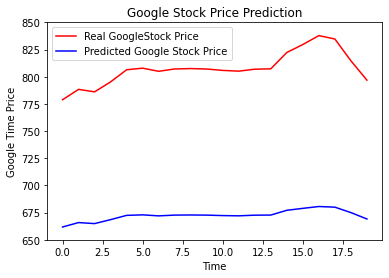

In [ ]:
# 2
summary_experiment(model)

# Demasiada regularización

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None
Epochs:     100
Batch size: 32

Test loss: 650848.625
MAE:       806.6175537109375



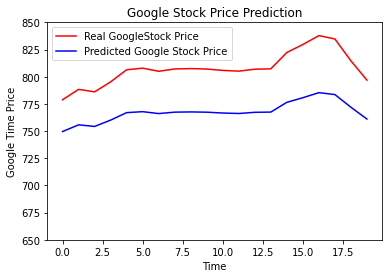

In [ ]:
# 1
summary_experiment(model)